# Analysing Titanic Dataset



In [ ]:
#data analysis libraries
import numpy as np
import pandas as pd
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import the dataset (CSV file)
train = pd.read_csv(r"/train.csv")

In [ ]:
"""The very first thing we should look at the features of the dataset. The column names are the features of a dataset"""
#get a list of the features within the dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
"""Each row of the dataset indicates an observation. It means each row provides all the information of a single passenger"""
#have an overview of the data.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#see a sample of the dataset to get an idea of the variables
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S
121,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,8.0500,NaN,S
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S


# Question: What is the difference between .head() and .sample() function ?
Answer:
.sample()Purpose: Returns a specified number of rows,and it returns one row if n is not specified.
head()
Purpose:it is used to get the top N rows from DataFrame or top N elements from a Series, when arguments are not stated they return the first five rows.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
"""To get an statitical analysis for each column, python has a function called describe. It provides the unique values,
mean, minimum and maximum values, standard deviation and so on"""
#see a summary of the training dataset
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# There are a total of 891 passengers in the training set.
Question: There are a total of 714 values for Age feature in the training set. What is the percentage of missing values in Age column?
Answer:
To get the the Percentage of the missing values in the age column, we apply this formula:

Missing Percentage = (total rows - available values/ total rows) x 100

given:
Total passengers (rows) = 891
Available values for Age = 714

Missing values = 891 - 714 = 177
(177/891)×100 = 19.87%

 Answer:
The percentage of missing values in the Age column is approximately 19.87%.

# Question: What is the percentage of missing values in the Cabin feature ?.
to get the value of the percentage of the missing value in the cabin feature, we will use this method:

Missing Percentage = (total rows - available values/ total rows) x 100

given:
Total passengers (rows) = 891
Available values for cabin column = 201

Missing values = 891 - 204 = 687
(687/891)×100 = 77.11%
 Answer:
The percentage of the missing value in the cabin feature after calculating is approximately 77.11%.

# As the percentage of the missing value for the Cabin is high, it would be hard to fill in the missing values. Thus, drop the column is a good idea.


In [ ]:
train.drop(columns = ['Cabin'],  inplace = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
"""We can also check total how many values are missing for each feature"""
#check for any other unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


# Few Hypothesis (Initial Assumption):
Sex: Females are more likely to survive.

Pclass: People of higher socioeconomic class are more likely to survive.

SibSp/Parch: People traveling alone are more likely to survive.

Age: Young people are more likely to survive.

# Data Visualization
To see if our hypothesis is correct or not, we have to visualize the data
# Sex Feature
First one is done for you

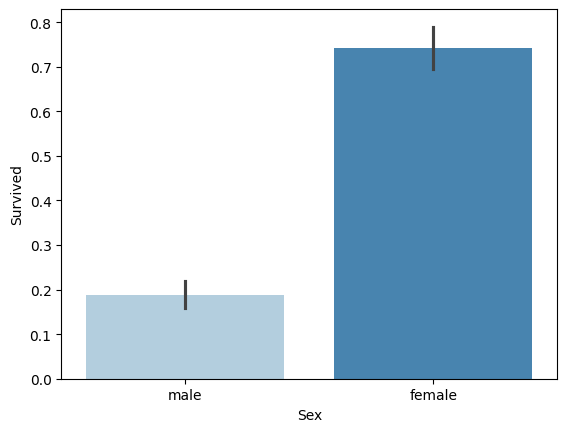

In [ ]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train, palette = "Blues")
plt.show()

Our first hypothesis seems correct. Females have a much higher chance of survival than males.
# Pclass Feature

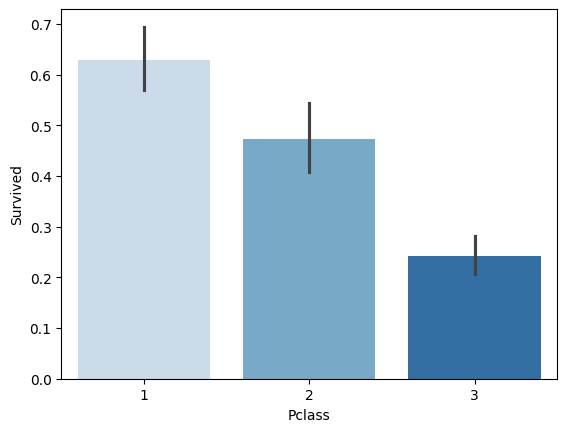

In [ ]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train, palette = "Blues")
plt.show()

Question: Write down your analysis.

Answer:
# Priority Boarding for Lifeboats
Due to the limited availability of lifeboats the "Birkenhead drill" policy was employed.
First-class passengers leveraged on the position of decks on the ship, which made it easier for them to be rescued while the other passengers
struggled to make it to the lifeboat.

# Better Living Conditions
First-class passengers had more convenient and spacious cabins and access to exit.
also the were likely informed promptly ,which gave them enough time to make it to the lifeboat.
Third-class passengers, located in the lower decks, with complex network of corridors and barriers made it difficult for them to make it to the lifeboat.

# Lifeboat Supply and Seating Capacity
The Titanic had only 20 lifeboats due to certain decisions on how the Appearance will be, They didn’t want it to be clustered as they reduced the number of available lifeboats from 32 to 20.

First-class Passengers got a better opportunity of being assigned to a lifeboat with the factors surrounding the situation.

# Social Status & Preferential  Treatment
First-class passengers were polpulated with the Elites and influential and the crew taught it wise to evacuate them first while
Many Third-class passengers were immigrants and were not considered as a matter of emergency and were not granted access to the lifeboat

# Parch Feature

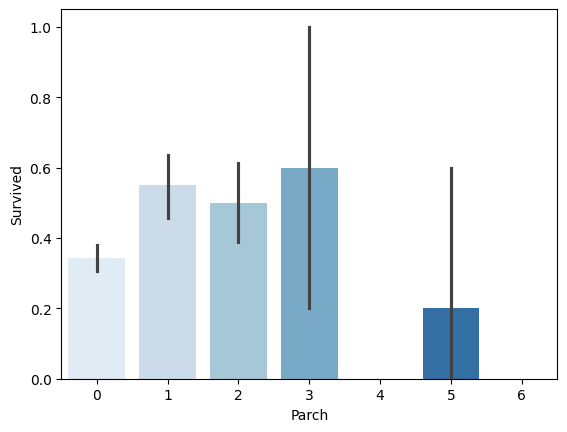

In [ ]:
#draw a bar plot for Parch vs. survival (Parch means having parents or children)
sns.barplot(x="Parch", y="Survived", data=train, palette = "Blues") # you can play with parameters to visualize more nicely.
plt.show()

# People Traveling Alone Had a Higher Chance of Survival
Solo travelers could make swift and independent decision without fear of leaving anyone behind. moving to the lifeboat was faster for them. although there were many men that were solo travellers and didn’t get chance to make it into the lifeboat, this actually benefited the women more than the men.
# Families with 3 Members Had the Best Survival Rate
A couple with one child or a single parent with two children typically made up a family of three. By giving the children priority during evacuation, the "women and children first" rule benefited these families. Smaller family groups were also more likely to stay together and fit into a lifeboat more ease.
# Large Families Had a Lower Survival Rate (e.g family of 4+ members)
Larger families were frequently separated during evacuations due to the lifeboat's limited capacity, which forced parents to make painful decisions—often giving up their own spots to ensure their children's safety.
| Family Size | Survival Rate | Reasoning |
|------------|--------------|-----------|
| 0 (Alone)  | High         | Could move swiftly, make independent choices without fear of leaving anyone behind|
| 1-3 members | Highest     | Small families or group could stay together, children prioritized  |
| 4+ members  | Low         | Painful Decisions were made ,for instance parents staying behind for their children to go|

 Notable point: this study didn’t make it clear to me as to why the result of families and group of five were high

# SibSp Feature

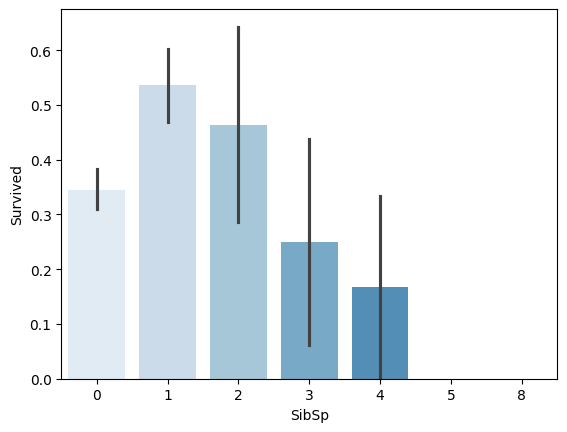

In [ ]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train, palette = "Blues")
plt.show()

# The Role of Age and Gender
Lifeboats were prioritized for young children (with parents or siblings), which helped family members who prioritized safety and were quick to react.
Women: Because they were given priority when entering lifeboats, women who traveled without  partners frequently had a greater survival percentage.

# Size of Family (Siblings and Spouses)
Small Families or Pairs (1-3 members): smaller families were easier to onboard on the lifeboat because the were easy to manage.
Survival of the Group: When a passenger traveled with a sibling or spouse, their chances of survival increased slightly because of the social bonds and shared decision-making.
#  The "Birkenhead drill" Rule
This rule extended to anyone with close familial ties as well as women and children. For instance, a spouse may prioritize protecting their spouse or kids because they know that doing so will increase their chances of surviving. Many of the siblings involved were in fact children, even though this law did not specifically address siblings.

# Age Feature
Here we have created a list that holds the range of passengers ages. According to the range, we define them as baby, child, adult etc. For instance, from any age value between 0 to 5 will be called as Age group baby.

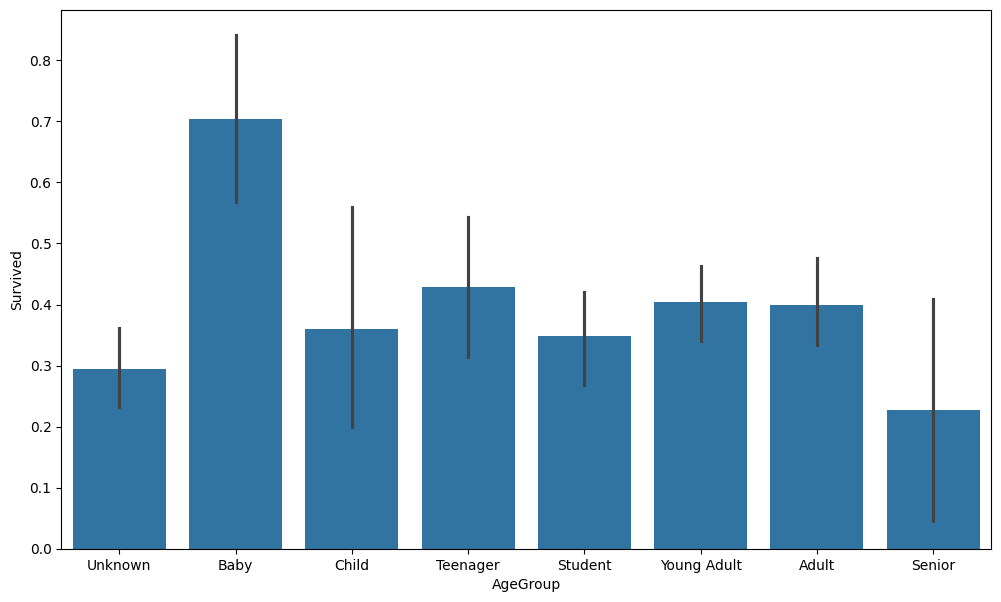

In [ ]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
#fill the missing values with -0.5 and defining them unknown. As we don't know from which Age group they belong.
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels) # Adding a feature named AgeGroup.
#draw a bar plot of Age vs. survival
plt.figure(figsize=(12,7))
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

 # Age Group 0-4: The Highest Survival Rate
The youngest children, those under five, were given the best chance to survive. With the "women and children first" policy in place, infants and toddlers—helpless and entirely dependent on others—were rushed to safety. Their small size and vulnerability tugged at the hearts of those making decisions, ensuring they were often the first to board lifeboats.
# Age Group 12-17: The Second Highest Survival Rate
Teenagers, particularly those between 12 and 17, also fared well. While not as urgently prioritized as the very young, their ties to family often worked in their favor. Younger teens, especially those around 12 to 14, were frequently treated like children, bundled into lifeboats by parents or strangers who saw their youth as a reason to save them. Their survival was a testament to the instinct to protect the young, even as chaos unfolded.
# Age Group 6-11: The Fourth Highest Survival Rate
For children aged 6 to 11, survival was still likely, though not as assured as for the youngest. These kids were old enough to understand what was happening but still relied heavily on adults for guidance. Parents and family members fought to keep them safe, though the urgency wasn’t quite the same as for babies and toddlers. Still, their innocence and dependence often earned them a spot on the lifeboats.
# Age Group 18-23: The Fifth Highest Survival Rate
Young adults, aged 18 to 23, faced a far grimmer reality. Though physically capable, they were caught in a difficult position—no longer children, yet not given the same priority as women or the very young. Many found themselves competing for limited spaces, often stepping aside for others or waiting too long for their chance. Their survival often came down to luck, circumstance, or the kindness of strangers.
# Age Group young adult and adult: The Thrid Highest Survival Rate
Adults, particularly men, faced the steepest odds. While they were strong and capable, they were last in line for lifeboats, often sacrificing their own chances to save others. Many delayed boarding to help women and children, while others simply couldn’t find space. For those in first class, survival was slightly more likely—less crowded conditions and better access to lifeboats gave them an edge. But for most adults, survival was a matter of selflessness, sacrifice, and the heartbreaking reality of limited resources.

# Part II
# 5) Cleaning Data
It's time to clean the missing values and unnecessary information!
Outliers can affect the performance of the predictive model. Moreover, unnecessary data makes the model more complex and ends up making a bad predictive model. Thus, we will drop unnecessary columns and fill the missing values that are important.
# Cabin Feature

In [ ]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
# i used the inplace = True in a previous task my Cabin column has alredy been dropped
#train = train.drop(['Cabin'], axis = 1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,W./C. 6607,23.4500,S,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Young Adult


# Ticket Feature

In [ ]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(['Ticket'], axis = 1)

# Embarked Feature
Embarked feature represents from where the passengers got on board. Here 'S' represents Southampton, 'C' is Cherbourg and 'Q' is Queenstown. This can be a potential feature and thus, instead of dropping, we will keep the feature and fill up the missing values.

In [ ]:
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)
print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)
print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


The majority of people embarked in Southampton (S). It's a good practice to fill in the missing values with the most occurances when the number of missing values are few. But it differs depending on the situation. So, lets replace the missing embarked values with "S"

In [ ]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

# Age Feature
A higher percentage of values are missing for the age feature. However, it would be illogical to fill all of them with the same value. Instead, we'll try to find a way to predict the missing ages.

In [ ]:
#create a list to loop through all the values of the dataset
combine = [train]
"""First we will create another feature called Title and extract titles from the Name column. The following code snippet shows
how to extract or parse some portion of a string."""
#extract a title for each Name in the dataset
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex']) #this is how we can see the number of people holding which titles

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
"As the unique values of the Title column are a bit larger than expected, we will replace those with more common terms."
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
#in the above line we have replaced the tiles such as Lady, Capt, Col etc with Rare.
#the following lines are doing the same for different titles
dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
#this line shows the mean percentage of survived people of different titles.

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


Question: Did all the Royal titled passengers survive?

Answer : Yes all royal titled passengers survived the incident.

In [ ]:
"""As machine learning model understand numeric values, thus we need to define numerical values for categorical variables"""
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
dataset['Title'] = dataset['Title'].fillna(0)
#Here we have replaced all the title values with numerical values
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1


Next, we'll try to predict the missing Age values from the most common age for their Title.

Now that, we have changed the titles with the numerical values, we can easily filter out age values with proper
title and age group. Using only mean values to fill the age values is not a good idea. Hence, we are filtering
out the age groups with their titles and retrieveing the mode value. Mode
value means the value that appears often.

In [ ]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}
train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]

Now that we've filled in the missing values at least somewhat accurately, it's time to map each age group to a numerical value.

As mentioned earlier, most of the machine learning models can deal with only numerical values. Therefore, we will now transform those categorical values into numerical values and remove the features that are not worthy.

In [ ]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,4.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,6.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,5.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,5.0,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,5.0,1


# Name Feature
We can drop the name feature because we've extracted the titles.

In [ ]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)

# Sex Feature

In [ ]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,S,4.0,1
1,2,1,1,1,1,0,71.2833,C,6.0,3
2,3,1,3,1,0,0,7.9250,S,5.0,2
3,4,1,1,1,1,0,53.1000,S,5.0,3
4,5,0,3,0,0,0,8.0500,S,5.0,1


# Embarked  Feature

In [ ]:
import pandas as pd

# Sample Titanic dataset (ensure it's loaded properly)
# train = pd.read_csv("your_titanic_data.csv")

# Define mapping
embarked_mapping = {"S": 1, "C": 2, "Q": 3}

# Handle missing values and strip any whitespace
train['Embarked'] = train['Embarked'].astype(str).str.strip()  # Ensure it's a string and remove spaces
train['Embarked'].fillna('S', inplace=True)  # Replace NaN with a default value (e.g., 'S')

# Apply mapping
train['Embarked'] = train['Embarked'].map(embarked_mapping)

# Display result
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,1,4.0,1
1,2,1,1,1,1,0,71.2833,2,6.0,3
2,3,1,3,1,0,0,7.9250,1,5.0,2
3,4,1,1,1,1,0,53.1000,1,5.0,3
4,5,0,3,0,0,0,8.0500,1,5.0,1


# Fare Feature

In [ ]:
#drop Fare values
train = train.drop(['Fare'], axis = 1)
#check train data
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,1,4.0,1
1,2,1,1,1,1,0,2,6.0,3
2,3,1,3,1,0,0,1,5.0,2
3,4,1,1,1,1,0,1,5.0,3
4,5,0,3,0,0,0,1,5.0,1


Question: What differences you are observing here from the initial dataset?

Answer: All columns have been convert from variables to numerical ones to enable the machine run its test

Question:  Write some other ways to change categoriacal variables into numerical ones?
answer:Label Encoding-Assigns a unique integer to each category.

# 6) Choosing the Best Model
To construct a predictive model, we have to feed clean data to the model. Thats what we were doing in the above sections. Now, to train a model and measure the performance of the model, we will split the clean data into two parts. One part is called the training data by which we will train the model and the
other part is called the validation data by which we will measure the performance of the data. Conventionally, its better to preserve 80% of data for the training set and 20% for the validation set.
However, if you have a very large dataset such as 10 million observations, then its better to have 99% of training data and 1% of validation data. Because our target is to train the model with as much data as we can. And test the model with sufficient amount of validation data. 1% of 10 million is ten thousand
data. Which is enough of validation purpose.
# Splitting the Training Data
We will use split of our training data into training and validation set to test the accuracy of different models. Please check here to know more about the reason behind splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

# Testing Different Models
Try to test the following models with the training data
 + Logistic Regression
+ Support Vector Machines
+ Decision Tree Classifier
+ Random Forest Classifier
+ KNN or k-Nearest Neighbors
  
For each model, set the model, fit it with 80% of the training data, predict for 20% of the training data and check the accuracy.

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression() #store the model into your own specified variable. Now logreg is a logistic regression model.
logreg.fit(x_train, y_train) #train the model with the training data.
y_pred = logreg.predict(x_val) #predict the value of the validation data
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2) #Compare the predicted value with the true value to get the accuracy.
print(acc_logreg)

77.65


Similarly we have done the same approach for all the other algorithms to see which algorithm suits better for our problem.

**It is very hard to choose a single machine learning model instantly. It depends on the dataset and what you want to do with. Thus, it is a better practice to check different algorithms and finally select the best fitted one.**

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.68


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

78.21


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

79.33


In [ ]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

83.24


In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
        'Random Forest', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_logreg,
        acc_randomforest, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,KNN,83.24
0,Support Vector Machines,82.68
3,Random Forest,79.33
4,Decision Tree,78.21
2,Logistic Regression,77.65


Question: Compare all the above models and draw a conclusion which model should we use and why!

Answer:
Observations
+ Sure! Here's a shorter and more humanized version:

+ KNN nailed it with 83.24% accuracy —our top performer in this case study!  
+ SVM was close behind at 82.68%, still a great pick.  
+ Decision Tree and Random Forest did okay (79.89), but they’re not the stars here.  
+ Logistic Regression trailed at 77.65%, so it’s not the best fit this time.

Final Call:  
+ For small, tidy datasets, go with KNN—it’s the champ.  
+ For bigger datasets, try SVM or Random Forest—they’re faster and still strong.  
+ If you need something easy to explain, Logistic Regression or Decision Tree might work, even if they’re less accurate.

In Summary: KNN wins for accuracy, but pick based on your needs—speed, simplicity, or performance!
